In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
plt.rc("font", family="Malgun Gothic")
mpl.rcParams["axes.unicode_minus"] = False
# from sklearn.datasets import load_boston

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, names=column_names)
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [9]:
dfx = pd.DataFrame(data, columns=column_names[:-1])
dfx.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
dfy = pd.DataFrame(target, columns=['MEDV'])

In [11]:
df = pd.concat([dfx, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


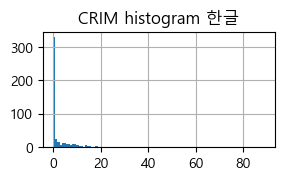

In [30]:
df['CRIM'].hist(bins=100, figsize=(3,1.5))
plt.title('CRIM histogram 한글')
plt.show()
# 0근처의 값이 가장 많은 지수분포와 유사하다.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


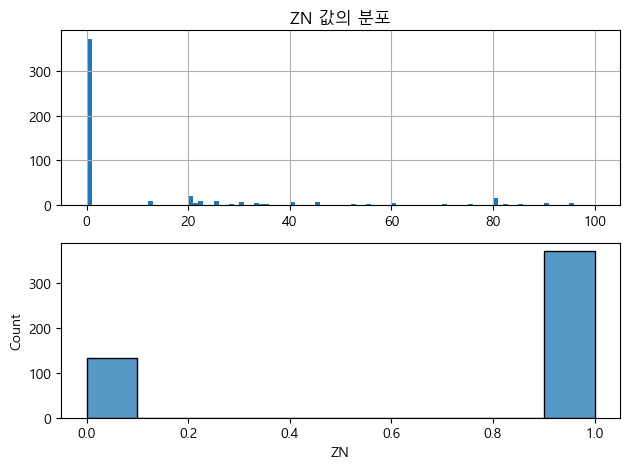

In [41]:
plt.subplot(211)
df['ZN'].hist(bins=100)
plt.title("ZN 값의 분포")
plt.subplot(212)
sns.histplot(df['ZN'] == 0.0)
plt.tight_layout()
plt.show()

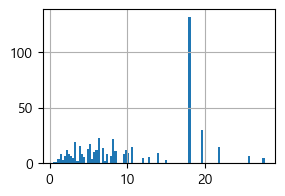

In [44]:
df['INDUS'].hist(bins=100, figsize=(3,2))
plt.show()

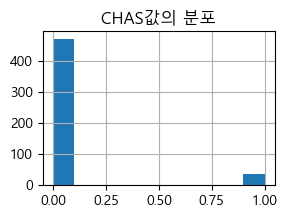

In [45]:
df['CHAS'].hist(figsize=(3,2))
plt.title('CHAS값의 분포')
plt.show()

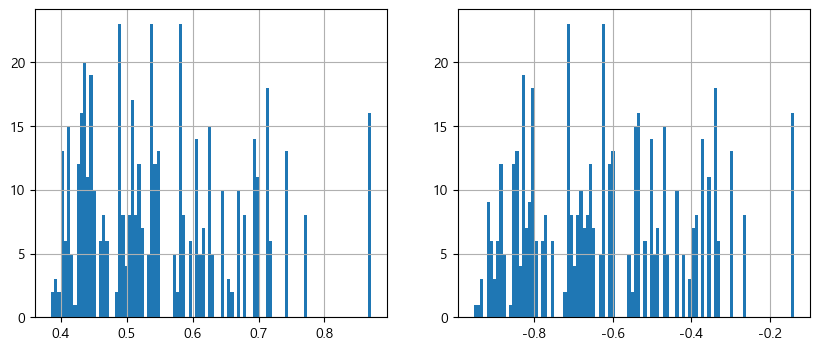

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(121)
df['NOX'].hist(bins=100)
plt.subplot(122)
np.log(df['NOX']).hist(bins=100)
plt.show()

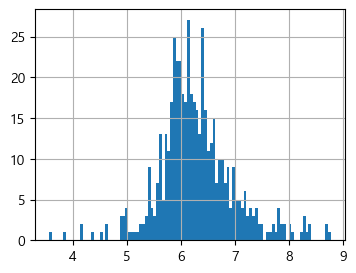

In [52]:
df['RM'].hist(bins=100, figsize=(4,3))
plt.show()

In [53]:
df['AGE'].max()

100.0

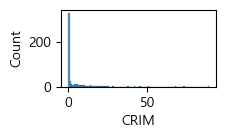

In [65]:
plt.figure(figsize=(2,1))
sns.histplot(df['CRIM'], kde=False)
plt.show()

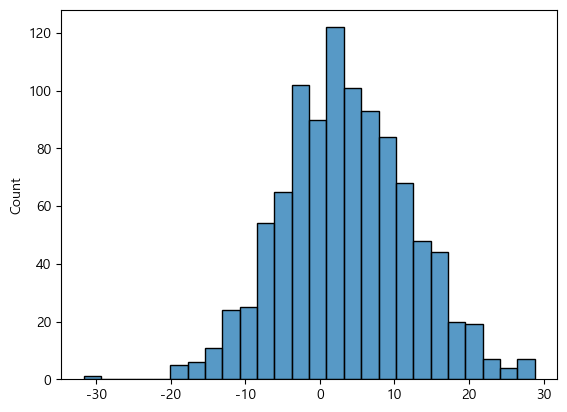

norm ___ (3.613523557312254, 8.59304135129577)


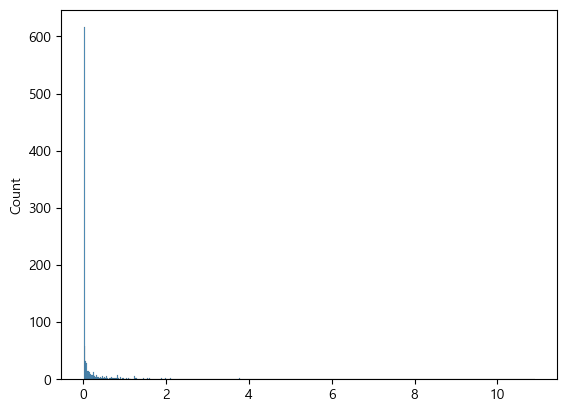

gamma ___ (0.1122255760563986, 0.006319999999999999, 2.6399092488981157)


C:\Users\unhoc\anaconda3\envs\pymc\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\unhoc\anaconda3\envs\pymc\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


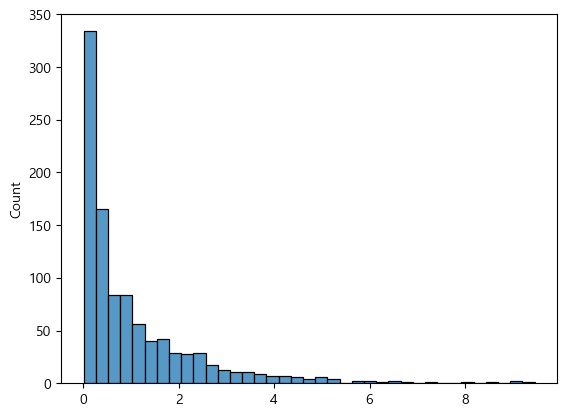

beta ___ (0.5902679422876747, 146.19417545050032, 0.006319999999999999, 264.3357141183152)


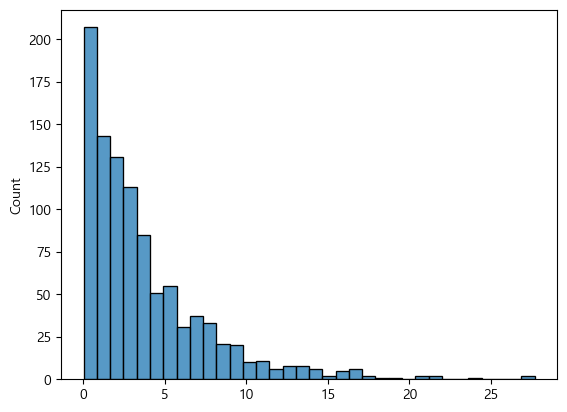

expon ___ (0.00632, 3.607203557312254)


MemoryError: Unable to allocate 4.85 GiB for an array with shape (650575728,) and data type int64

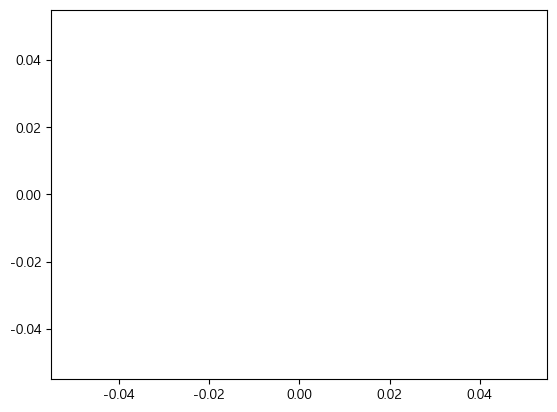

In [77]:
import scipy
import scipy.stats as stats

data=df['CRIM']

dist_names = ["norm", "gamma", "beta", "expon", "t", "chi2", "lognorm"]
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)  # 분포의 특징을 가져와서
    param = dist.fit(data) # 관측값을 이용하여 가정한 분포의 모수를 추정 
    sample = dist(*param).rvs(1000)
#     sns.histplot(sample)
#     plt.show()
    print(dist_name,"___", param)
    params[dist_name] = param # 추정한 모수를 Dictionary에 넣고
    Stat, p = stats.kstest(data, dist_name, param) # Kolmogorov-Smirnov 검정을 합니다. 
    dist_results.append((dist_name, p)) # 결과를 list에 넣고요, 
 
print(dist_results) # 각 분포의 p value를 한 번 보고요. 
best_dist, best_p = (max(dist_results, key=lambda item: item[1])) # 그중에 제일 p값이 큰 것을 찾고요
print("제일 비슷한 분포: %s"%(best_dist))
print("그 분포의 p_value: %f"%(best_p))

## 20220706 머피 확률적학습 교재 학습

$\lambda$는 $\Lambda\$이다.

$\omega$는 $\Omega$이다.

$\psi$는 $\Psi$이다.

$\xi$는 $\Xi$이다.

$\delta$는 $\Delta$이다.

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.data[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
x2 = iris.data[1,:].reshape(-1,1)
x2

array([[4.9],
       [3. ],
       [1.4],
       [0.2]])

In [7]:
p = np.array([1000000, 800000, 500000])
n = np.array([3,4,5])
p @ n

8700000

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
A = df.loc[:3,['CRIM','NOX','RM',"AGE"]]
b = df['MEDV'][:4]

In [24]:
print(A.shape)
print(len(b))
Ainv = np.linalg.inv(A.to_numpy())
x = np.dot(Ainv, b)
print(x)

(4, 4)
4
[-3.12710043e+02 -1.15193942e+02  1.44996465e+01 -1.13259317e-01]


In [27]:
A = df.iloc[:,:-1]
print(A.shape)
b = df['MEDV']
print(len(b))
x, resid, rank, s = np.linalg.lstsq(A,b, rcond=None)
print(x) # 가중치
print(resid) # 잔차
print(rank) # 랭크
print(s) # 특이값

(506, 13)
506
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
[12228.04626104]
13
[1.25851816e+04 3.44597406e+03 6.45757109e+02 4.02050461e+02
 1.58964612e+02 1.21502936e+02 9.04652420e+01 7.79311708e+01
 6.50828345e+01 2.46251803e+01 1.80945451e+01 5.51505065e+00
 1.48096916e+00]
